# RNN for sequence regression

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd

### Create the test sequence

In [2]:
def createSequences(nseq, n_steps, low=10, delta=10):
    X = []
    Y = []
    for i in range(nseq):
        seq = np.arange(low+i*delta, low+i*delta+n_steps*delta, delta)
        target = low+i*delta+n_steps*delta
        X.append(seq)
        Y.append(target)
        
    return np.array(X, dtype='float32').reshape(-1, n_steps), np.array(Y, dtype='float32, ').reshape(-1, 1)

In [3]:
createSequences(5, 3,low=0, delta=2)

(array([[ 0.,  2.,  4.],
        [ 2.,  4.,  6.],
        [ 4.,  6.,  8.],
        [ 6.,  8., 10.],
        [ 8., 10., 12.]], dtype=float32),
 array([[ 6.],
        [ 8.],
        [10.],
        [12.],
        [14.]], dtype=float32))

In [4]:
n_steps = 5
X, y = createSequences(20, n_steps)

for a,b in zip(X,y):
    print(a,b)

[10. 20. 30. 40. 50.] [60.]
[20. 30. 40. 50. 60.] [70.]
[30. 40. 50. 60. 70.] [80.]
[40. 50. 60. 70. 80.] [90.]
[50. 60. 70. 80. 90.] [100.]
[ 60.  70.  80.  90. 100.] [110.]
[ 70.  80.  90. 100. 110.] [120.]
[ 80.  90. 100. 110. 120.] [130.]
[ 90. 100. 110. 120. 130.] [140.]
[100. 110. 120. 130. 140.] [150.]
[110. 120. 130. 140. 150.] [160.]
[120. 130. 140. 150. 160.] [170.]
[130. 140. 150. 160. 170.] [180.]
[140. 150. 160. 170. 180.] [190.]
[150. 160. 170. 180. 190.] [200.]
[160. 170. 180. 190. 200.] [210.]
[170. 180. 190. 200. 210.] [220.]
[180. 190. 200. 210. 220.] [230.]
[190. 200. 210. 220. 230.] [240.]
[200. 210. 220. 230. 240.] [250.]


In [5]:
n_steps = 5
X1, y1 = createSequences(20, n_steps , low=210)
y1 = y1+20
for a,b in zip(X1,y1):
    print(a,b)

[210. 220. 230. 240. 250.] [280.]
[220. 230. 240. 250. 260.] [290.]
[230. 240. 250. 260. 270.] [300.]
[240. 250. 260. 270. 280.] [310.]
[250. 260. 270. 280. 290.] [320.]
[260. 270. 280. 290. 300.] [330.]
[270. 280. 290. 300. 310.] [340.]
[280. 290. 300. 310. 320.] [350.]
[290. 300. 310. 320. 330.] [360.]
[300. 310. 320. 330. 340.] [370.]
[310. 320. 330. 340. 350.] [380.]
[320. 330. 340. 350. 360.] [390.]
[330. 340. 350. 360. 370.] [400.]
[340. 350. 360. 370. 380.] [410.]
[350. 360. 370. 380. 390.] [420.]
[360. 370. 380. 390. 400.] [430.]
[370. 380. 390. 400. 410.] [440.]
[380. 390. 400. 410. 420.] [450.]
[390. 400. 410. 420. 430.] [460.]
[400. 410. 420. 430. 440.] [470.]


Reshape the data

In [6]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1 
X = X.reshape((X.shape[0], X.shape[1], n_features))

## Generating sequences from arbitrary series

In [7]:
ts=np.arange(210,480,10)
print(ts)

[210 220 230 240 250 260 270 280 290 300 310 320 330 340 350 360 370 380
 390 400 410 420 430 440 450 460 470]


In [8]:
dataset = tf.keras.utils.timeseries_dataset_from_array(ts, ts[5:], 5)

for batch in dataset:
    ts_X, ts_y = batch

In [9]:
print(ts_X[:5])
print(f'{ts_X.shape = }')

tf.Tensor(
[[210 220 230 240 250]
 [220 230 240 250 260]
 [230 240 250 260 270]
 [240 250 260 270 280]
 [250 260 270 280 290]], shape=(5, 5), dtype=int32)
ts_X.shape = TensorShape([22, 5])


In [10]:
print(ts_y[:5])
print(f'{ts_y.shape = }')

tf.Tensor([260 270 280 290 300], shape=(5,), dtype=int32)
ts_y.shape = TensorShape([22])


In [11]:
ts_a = np.arange(210,450,10)
ts_b = np.arange(280,520,10)

In [12]:
dataset_a = tf.keras.utils.timeseries_dataset_from_array(ts_a, None, 5)

for batch in dataset_a:
    ts_ab_X = batch
    print(ts_ab_X)

tf.Tensor(
[[210 220 230 240 250]
 [220 230 240 250 260]
 [230 240 250 260 270]
 [240 250 260 270 280]
 [250 260 270 280 290]
 [260 270 280 290 300]
 [270 280 290 300 310]
 [280 290 300 310 320]
 [290 300 310 320 330]
 [300 310 320 330 340]
 [310 320 330 340 350]
 [320 330 340 350 360]
 [330 340 350 360 370]
 [340 350 360 370 380]
 [350 360 370 380 390]
 [360 370 380 390 400]
 [370 380 390 400 410]
 [380 390 400 410 420]
 [390 400 410 420 430]
 [400 410 420 430 440]], shape=(20, 5), dtype=int32)


In [13]:
dataset_b = tf.keras.utils.timeseries_dataset_from_array(ts_b, None, 1)
for batch in dataset_b:
    ts_ab_y = batch
    print(ts_ab_y)

tf.Tensor(
[[280]
 [290]
 [300]
 [310]
 [320]
 [330]
 [340]
 [350]
 [360]
 [370]
 [380]
 [390]
 [400]
 [410]
 [420]
 [430]
 [440]
 [450]
 [460]
 [470]
 [480]
 [490]
 [500]
 [510]], shape=(24, 1), dtype=int32)


In [14]:
for tx, ty in zip(ts_ab_X, ts_ab_y):
    #print(f'{tx = }\t{ty = }')
    print(tx, ty)

tf.Tensor([210 220 230 240 250], shape=(5,), dtype=int32) tf.Tensor([280], shape=(1,), dtype=int32)
tf.Tensor([220 230 240 250 260], shape=(5,), dtype=int32) tf.Tensor([290], shape=(1,), dtype=int32)
tf.Tensor([230 240 250 260 270], shape=(5,), dtype=int32) tf.Tensor([300], shape=(1,), dtype=int32)
tf.Tensor([240 250 260 270 280], shape=(5,), dtype=int32) tf.Tensor([310], shape=(1,), dtype=int32)
tf.Tensor([250 260 270 280 290], shape=(5,), dtype=int32) tf.Tensor([320], shape=(1,), dtype=int32)
tf.Tensor([260 270 280 290 300], shape=(5,), dtype=int32) tf.Tensor([330], shape=(1,), dtype=int32)
tf.Tensor([270 280 290 300 310], shape=(5,), dtype=int32) tf.Tensor([340], shape=(1,), dtype=int32)
tf.Tensor([280 290 300 310 320], shape=(5,), dtype=int32) tf.Tensor([350], shape=(1,), dtype=int32)
tf.Tensor([290 300 310 320 330], shape=(5,), dtype=int32) tf.Tensor([360], shape=(1,), dtype=int32)
tf.Tensor([300 310 320 330 340], shape=(5,), dtype=int32) tf.Tensor([370], shape=(1,), dtype=int32)


Create the model using a single hidden layer and only one output (we have only one target feature)

In [15]:
model = tf.keras.Sequential()
model.add(layers.LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(layers.Dense(1))

C:\Users\lucat\GitHub\AI_LAB\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
# model.compile(optimizer=tf.keras.optimizers.Adam(0.01), 
#               loss=tf.keras.losses.MeanSquaredError())

# for m1/m2/m3 based macs
model.compile(optimizer='adam', 
              loss=tf.keras.losses.MeanSquaredError())

In [17]:
# model.fit(X, y, epochs=200, batch_size=64, verbose=1)
history = model.fit(X, y, epochs=200, verbose=1)

Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 25253.2168
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 25068.3672
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 24888.6797
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 24713.0586
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 24540.4629
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 24369.8613
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 24200.2695
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 24030.6484
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 23872.7129
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 23722.5781
Epoch 11/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 23571.4492
Epoch 12/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 23415.9961
Epoch 13/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 23255.5742
Epoch 14/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 23086.5293
Epoch 15/200
1/1 ━━━━━━━━━━━━━━

<Axes: >

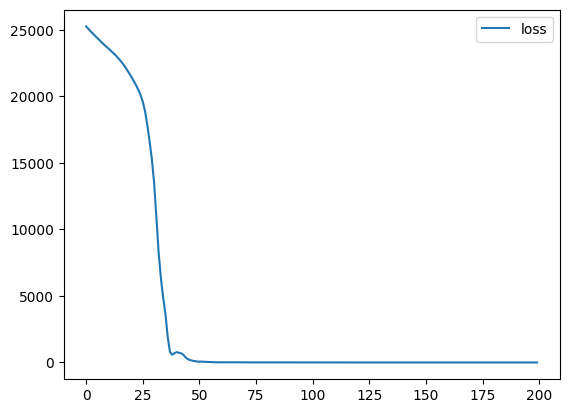

In [18]:
pd.DataFrame(history.history).plot()

### Test the performace of RNN

In [19]:
test_data = np.array([95, 105, 115, 125, 135])
test_data = test_data.reshape((1, n_steps, n_features))
test_data

array([[[ 95],
        [105],
        [115],
        [125],
        [135]]])

In [20]:
predictNextNumber = model.predict(test_data, verbose=1)
print(predictNextNumber)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
[[145.3713]]


In [21]:
test_data = np.arange(250, 300, 10)
test_data = test_data.reshape((1, n_steps, n_features))
test_data

array([[[250],
        [260],
        [270],
        [280],
        [290]]])

In [22]:
predictNextNumber = model.predict(test_data, verbose=1)
print(predictNextNumber)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[[303.3037]]


In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,355 (122.48 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,904 (81.66 KB)

# RNN for Sequence Classification

In [24]:
threshold=700


y = [ 0 if x<threshold else 1 for x in np.sum(X, axis=1)]

y = np.array(y)
for a,b in zip(X,y):
    print(np.transpose(a), b)

[[10. 20. 30. 40. 50.]] 0
[[20. 30. 40. 50. 60.]] 0
[[30. 40. 50. 60. 70.]] 0
[[40. 50. 60. 70. 80.]] 0
[[50. 60. 70. 80. 90.]] 0
[[ 60.  70.  80.  90. 100.]] 0
[[ 70.  80.  90. 100. 110.]] 0
[[ 80.  90. 100. 110. 120.]] 0
[[ 90. 100. 110. 120. 130.]] 0
[[100. 110. 120. 130. 140.]] 0
[[110. 120. 130. 140. 150.]] 0
[[120. 130. 140. 150. 160.]] 1
[[130. 140. 150. 160. 170.]] 1
[[140. 150. 160. 170. 180.]] 1
[[150. 160. 170. 180. 190.]] 1
[[160. 170. 180. 190. 200.]] 1
[[170. 180. 190. 200. 210.]] 1
[[180. 190. 200. 210. 220.]] 1
[[190. 200. 210. 220. 230.]] 1
[[200. 210. 220. 230. 240.]] 1


In [25]:
print(f'{(n_steps, n_features) = }')

(n_steps, n_features) = (5, 1)


In [26]:
classificator = tf.keras.Sequential()
classificator.add(layers.LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
classificator.add(layers.Dense(1, activation='sigmoid'))

C:\Users\lucat\GitHub\AI_LAB\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [27]:
# classificator.compile(optimizer=tf.keras.optimizers.Adam(0.01), loss='binary_crossentropy', 
#                       metrics =['accuracy'])

classificator.compile(optimizer='adam',
                      loss='binary_crossentropy', 
                      metrics =['accuracy'])

classificator.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
history = classificator.fit(X, y.reshape(-1,1), epochs=200, verbose=1)

Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.4000 - loss: 11.2365
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4000 - loss: 9.0958
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4000 - loss: 7.4968
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.3500 - loss: 6.0637
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3500 - loss: 4.7124
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.3000 - loss: 3.4387
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.2000 - loss: 2.2967
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.1000 - loss: 1.5285
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4500 - loss: 1.5531
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4500 - loss: 1.8567
Epoch 11/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4500 - loss: 2.0929
Epoch 12/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4500 - los

<Axes: >

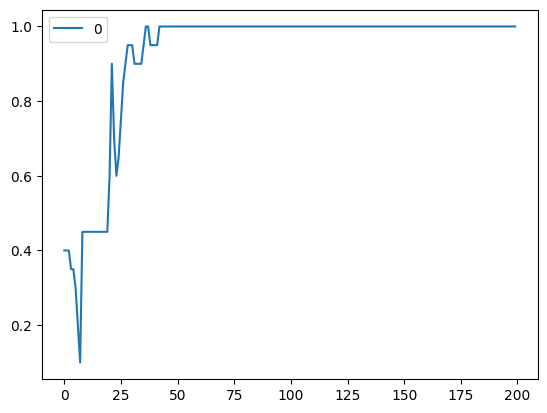

In [29]:
pd.DataFrame(history.history['accuracy']).plot()

In [30]:
test_data = np.array([90, 100, 10, 20, 130])
test_data = test_data.reshape((1, n_steps, n_features))
pred = classificator.predict(test_data)[0, 0]

print('attribute sum {} prediction {:.3f}'.format(np.sum(test_data), float(pred)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
attribute sum 350 prediction 0.000


In [31]:
test_data = np.array([240, 250, 210, 220, 230])
test_data = test_data.reshape((1, n_steps, n_features))
pred = classificator.predict(test_data)[0, 0]
print('attribute sum {} prediction {:.3f}'.format(np.sum(test_data), float(pred)))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
attribute sum 1150 prediction 0.000
